### import important library

In [1159]:
import os
import csv
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date as dt
import pandas_ta as ta
import matplotlib.pyplot as plt
import mibian as mb
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [1160]:
sns.set_style("ticks")

In [1161]:
os.chdir('/Users/healofy101/downloads/final_project')
print(os.getcwd())

/Users/healofy101/Downloads/final_project


### Input - Option Data  2015-2020

In [1162]:
input_data = pd.read_csv("final_option_input_data.csv")
#                         names=["contract","date","type","strike_price","expiry","open","high","low","close","oi","month_type"])
del input_data['Unnamed: 0']

In [1163]:
len(input_data['contract'].unique())

51

### Change and Select contract

In [1164]:
select_contract = "NIFTY"
input_data=input_data[input_data['contract']== select_contract]

In [1165]:
input_data = input_data.dropna()

input_data["date"] = input_data["date"].astype('int')
input_data["expiry"] = input_data["expiry"].astype('int')

input_data['join_col'] = input_data['contract']+input_data['date'].astype('str')
# input_data.head()
input_data.tail()

,contract,date,type,strike_price,expiry,open,high,low,close,oi,month_type,join_col
5018667,NIFTY,20201231,PE,15300.0,20201231,1308.95,1308.95,1308.95,1308.95,150.0,Near,NIFTY20201231
5018668,NIFTY,20201231,PE,15350.0,20201231,0.00,0.00,0.00,1472.35,0.0,Near,NIFTY20201231
5018669,NIFTY,20201231,PE,15400.0,20201231,0.00,0.00,0.00,1464.45,0.0,Near,NIFTY20201231
5018670,NIFTY,20201231,PE,15450.0,20201231,0.00,0.00,0.00,1514.45,0.0,Near,NIFTY20201231
5018671,NIFTY,20201231,PE,15500.0,20201231,1486.50,1527.20,1486.45,1527.20,150.0,Near,NIFTY20201231


In [1166]:
input_data["strike_price"] = input_data["strike_price"].astype('float')

### Input Spot_data 2015-2020

In [1167]:
eq_input_data = pd.read_csv("nse_equity_data_unadjusted_2015-2020.csv")

### calcuating ATR

In [1168]:
eq_input_data['ATR'] = ta.atr(eq_input_data['high'],eq_input_data['low'],eq_input_data['close'],timeperiod=14)

In [1169]:
eq_input_data['join_col'] = eq_input_data['ticker']+eq_input_data['date'].astype('str')

### merge both option and spot data

In [1170]:
input_result = pd.merge(input_data, eq_input_data, how="left", on="join_col")

In [1171]:
input_result.tail(5)

,contract,date_x,type,strike_price,expiry,open_x,high_x,low_x,close_x,oi,month_type,join_col,ticker,date_y,open_y,high_y,low_y,close_y,volume,ATR
282113,NIFTY,20201231,PE,15300.0,20201231,1308.95,1308.95,1308.95,1308.95,150.0,Near,NIFTY20201231,NIFTY,20201231.0,13970.0,14024.8,13936.5,13981.8,0,170.270096
282114,NIFTY,20201231,PE,15350.0,20201231,0.00,0.00,0.00,1472.35,0.0,Near,NIFTY20201231,NIFTY,20201231.0,13970.0,14024.8,13936.5,13981.8,0,170.270096
282115,NIFTY,20201231,PE,15400.0,20201231,0.00,0.00,0.00,1464.45,0.0,Near,NIFTY20201231,NIFTY,20201231.0,13970.0,14024.8,13936.5,13981.8,0,170.270096
282116,NIFTY,20201231,PE,15450.0,20201231,0.00,0.00,0.00,1514.45,0.0,Near,NIFTY20201231,NIFTY,20201231.0,13970.0,14024.8,13936.5,13981.8,0,170.270096
282117,NIFTY,20201231,PE,15500.0,20201231,1486.50,1527.20,1486.45,1527.20,150.0,Near,NIFTY20201231,NIFTY,20201231.0,13970.0,14024.8,13936.5,13981.8,0,170.270096


In [1172]:
input_result = input_result[['contract','date_x','type','strike_price','expiry','open_x','high_x','low_x','close_x','oi','close_y','ATR']]

In [1173]:
input_result = input_result.rename(columns={'date_x': 'date', 'open_x':'open','high_x':'high','low_x':'low','close_x':'close','close_y':'spot_price'})

In [1174]:
input_result['spot_price'].describe()

count    280356.000000
mean       9928.555447
std        1525.449645
min        6970.600000
25%        8526.350000
50%       10118.200000
75%       11105.300000
max       13982.000000
Name: spot_price, dtype: float64

In [1175]:
# select_contract = "NIFTY"
input_result=input_result[input_result['contract']== select_contract]

In [1176]:
input_result

,contract,date,type,strike_price,expiry,open,high,low,close,oi,spot_price,ATR
0,NIFTY,20150101,CE,6550.0,20150129,0.00,0.00,0.00,1731.15,76900.0,8284.0,207.574909
1,NIFTY,20150101,CE,6600.0,20150129,1710.00,1730.00,1710.00,1728.00,400150.0,8284.0,207.574909
2,NIFTY,20150101,CE,6650.0,20150129,0.00,0.00,0.00,1670.00,25.0,8284.0,207.574909
3,NIFTY,20150101,CE,6700.0,20150129,1600.00,1635.00,1585.00,1626.15,466325.0,8284.0,207.574909
4,NIFTY,20150101,CE,6750.0,20150129,0.00,0.00,0.00,1565.40,0.0,8284.0,207.574909
...,...,...,...,...,...,...,...,...,...,...,...,...
282113,NIFTY,20201231,PE,15300.0,20201231,1308.95,1308.95,1308.95,1308.95,150.0,13981.8,170.270096
282114,NIFTY,20201231,PE,15350.0,20201231,0.00,0.00,0.00,1472.35,0.0,13981.8,170.270096
282115,NIFTY,20201231,PE,15400.0,20201231,0.00,0.00,0.00,1464.45,0.0,13981.8,170.270096
282116,NIFTY,20201231,PE,15450.0,20201231,0.00,0.00,0.00,1514.45,0.0,13981.8,170.270096


### Make Pivot data

In [1177]:
pivot_data = pd.pivot_table(input_result, values='close', index=['date','expiry','type','contract','spot_price','ATR'],
                    columns=['strike_price'], aggfunc=np.sum)
pivot_data

strike_price                                           2700.0   2800.0   \
date     expiry   type contract spot_price ATR                            
20150101 20150129 CE   NIFTY    8284.00    207.574909      NaN      NaN   
                  PE   NIFTY    8284.00    207.574909      NaN      NaN   
20150102 20150129 CE   NIFTY    8395.45    201.790987      NaN      NaN   
                  PE   NIFTY    8395.45    201.790987      NaN      NaN   
20150105 20150129 CE   NIFTY    8378.40    193.213059      NaN      NaN   
...                                                        ...      ...   
20201229 20201231 PE   NIFTY    13932.60   180.004372      NaN      NaN   
20201230 20201231 CE   NIFTY    13982.00   176.575488      NaN      NaN   
                  PE   NIFTY    13982.00   176.575488      NaN      NaN   
20201231 20201231 CE   NIFTY    13981.80   170.270096      NaN      NaN   
                  PE   NIFTY    13981.80   170.270096      NaN      NaN   

strike_price                                           2900.0   3000.0   \
date     expiry   type contract spot_price ATR                            
20150101 20150129 CE   NIFTY    8284.00    207.574909      NaN      NaN   
                  PE   NIFTY    8284.00    207.574909      NaN      NaN   
20150102 20150129 CE   NIFTY    8395.45    201.790987      NaN      NaN   
                  PE   NIFTY    8395.45    201.790987      NaN      NaN   
20150105 20150129 CE   NIFTY    8378.40    193.213059      NaN      NaN   
...                                                        ...      ...   
20201229 20201231 PE   NIFTY    13932.60   180.004372      NaN      NaN   
20201230 20201231 CE   NIFTY    13982.00   176.575488      NaN      NaN   
                  PE   NIFTY    13982.00   176.575488      NaN      NaN   
20201231 20201231 CE   NIFTY    13981.80   170.270096      NaN      NaN   
                  PE   NIFTY    13981.80   170.270096      NaN      NaN   

strike_price                                           3100.0   3200.0   \
date     expiry   type contract spot_price ATR                            
20150101 20150129 CE   NIFTY    8284.00    207.574909      NaN      NaN   
                  PE   NIFTY    8284.00    207.574909      NaN      NaN   
20150102 20150129 CE   NIFTY    8395.45    201.790987      NaN      NaN   
                  PE   NIFTY    8395.45    201.790987      NaN      NaN   
20150105 20150129 CE   NIFTY    8378.40    193.213059      NaN      NaN   
...                                                        ...      ...   
20201229 20201231 PE   NIFTY    13932.60   180.004372      NaN      NaN   
20201230 20201231 CE   NIFTY    13982.00   176.575488      NaN      NaN   
                  PE   NIFTY    13982.00   176.575488      NaN      NaN   
20201231 20201231 CE   NIFTY    13981.80   170.270096      NaN      NaN   
                  PE   NIFTY    13981.80   170.270096      NaN      NaN   

strike_price                                           3300.0   3400.0   \
date     expiry   type contract spot_price ATR                            
20150101 20150129 CE   NIFTY    8284.00    207.574909      NaN      NaN   
                  PE   NIFTY    8284.00    207.574909      NaN      NaN   
20150102 20150129 CE   NIFTY    8395.45    201.790987      NaN      NaN   
                  PE   NIFTY    8395.45    201.790987      NaN      NaN   
20150105 20150129 CE   NIFTY    8378.40    193.213059      NaN      NaN   
...                                                        ...      ...   
20201229 20201231 PE   NIFTY    13932.60   180.004372      NaN      NaN   
20201230 20201231 CE   NIFTY    13982.00   176.575488      NaN      NaN   
                  PE   NIFTY    13982.00   176.575488      NaN      NaN   
20201231 20201231 CE   NIFTY    13981.80   170.270096      NaN      NaN   
                  PE   NIFTY    13981.80   170.270096      NaN      NaN   

strike_price                                           3500.0   3600.0   ...  \
date     expiry 

In [1178]:
pivot_data.to_csv("stock_pivot.csv")

In [1179]:
# pivot_data.to_csv("stock_pivot.csv")

In [1180]:
table = pd.read_csv("stock_pivot.csv")

In [1181]:
table

,date,expiry,type,contract,spot_price,ATR,2700.0,2800.0,2900.0,3000.0,...,15050.0,15100.0,15150.0,15200.0,15250.0,15300.0,15350.0,15400.0,15450.0,15500.0
0,20150101,20150129,CE,NIFTY,8284.00,207.574909,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20150101,20150129,PE,NIFTY,8284.00,207.574909,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20150102,20150129,CE,NIFTY,8395.45,201.790987,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20150102,20150129,PE,NIFTY,8395.45,201.790987,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20150105,20150129,CE,NIFTY,8378.40,193.213059,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,20201229,20201231,PE,NIFTY,13932.60,180.004372,NaN,NaN,NaN,NaN,...,1146.95,1176.45,1462.10,1273.55,1501.20,1422.40,1472.35,NaN,NaN,NaN
2950,20201230,20201231,CE,NIFTY,13982.00,176.575488,NaN,NaN,NaN,NaN,...,0.70,0.60,0.45,0.45,0.25,0.35,0.05,0.05,1.00,NaN
2951,20201230,20201231,PE,NIFTY,13982.00,176.575488,NaN,NaN,NaN,NaN,...,1098.40,1119.05,1462.10,1218.00,1240.65,1322.85,1472.35,1464.45,1514.45,NaN
2952,20201231,20201231,CE,NIFTY,13981.80,170.270096,NaN,NaN,NaN,NaN,...,0.10,0.05,0.05,0.05,0.05,0.05,0.05,0.10,0.30,0.05


In [1182]:
table['ATM_Strike'] = round(table['spot_price']/100)*100
table['date']= pd.to_datetime(table['date'].astype('str'))
table['expiry']= pd.to_datetime(table['expiry'].astype('str'))

In [1183]:
stock=table
stock.drop(['contract'],axis=1,inplace=True)
stock.columns=stock.columns.astype('str')

In [1184]:
stock['month_year'] = pd.to_datetime(stock['date']).dt.to_period('M')
stock['day'] = pd.to_datetime(stock['date']).dt.strftime('%d')

In [1185]:
stock[['expiry','month_year']]

,expiry,month_year
0,2015-01-29,2015-01
1,2015-01-29,2015-01
2,2015-01-29,2015-01
3,2015-01-29,2015-01
4,2015-01-29,2015-01
...,...,...
2949,2020-12-31,2020-12
2950,2020-12-31,2020-12
2951,2020-12-31,2020-12
2952,2020-12-31,2020-12


In [1186]:
stock['rank'] = stock['expiry'].rank(ascending = 1)

In [1187]:
Table1 = stock.groupby('month_year').first()

In [1188]:
Table1['month_year'] = pd.to_datetime(Table1['date']).dt.to_period('M')

In [1189]:
len(Table1['month_year'])

72

In [1190]:
Table3 = pd.DataFrame({"date": ["0"], "spot_price":0, "expiry": ["0"], "type": ["0"], "month_year":0, "day": ["0"],"ATR":0})
Table5 = pd.DataFrame({"date": ["0"], "spot_price":0, "expiry": ["0"], "type": ["0"], "month_year":0, "day": ["0"],"ATR":0})

In [1191]:
CE_OTM_Strike = []
PE_OTM_Strike = []
month_year = []

In [1192]:
for x in range (0,71):
    e=Table1.month_year[x]
    d=Table1.expiry[x]
    a= float((Table1.ATM_Strike[x]))

    b = round((a +a*0.05)/100)*100
    c = round((a -a*0.05)/100)*100
#     b = round(a + 100)
#     c = round(a - 100)


    f1 = str(float(a))#ATM
    f2 = str(float(b))#OTM
    f3 = str(float(c))#OTM
    print(f" {x}, {e} ATM {a} CE_OTM {b}  PE_OTM {c}")

    
    CE_OTM_Strike.append(b)
    PE_OTM_Strike.append(c)
    month_year.append(e)
    
    Table2 = pd.DataFrame({"date": stock["date"], "spot_price": stock["spot_price"], "expiry": stock["expiry"],
                           "type": stock["type"], "month_year": stock["month_year"], "day": stock["day"],
                           "ATR":stock["ATR"], "CE_OTM": stock[f2]})
    
    Table12 = pd.DataFrame({"date": stock["date"], "spot_price": stock["spot_price"], "expiry": stock["expiry"],
                           "type": stock["type"], "month_year": stock["month_year"], "day": stock["day"],
                            "ATR":stock["ATR"], "PE_OTM": stock[f3]})

    
    Table6= Table2.where((Table2.month_year == e) & (Table2.expiry == d) & (Table2.type == 'CE'))
    Table4= Table12.where((Table12.month_year == e) & (Table12.expiry == d) & (Table12.type == 'PE'))
    
    Table6 = Table6.dropna()
    Table4 = Table4.dropna()

    Table4['day_to_expiry'] = (Table4['expiry']-Table4["date"]).dt.days
    
    Table6.set_index("date", inplace = True)
    Table4.set_index("date", inplace = True)

    Table4['CE_OTM'] = Table6['CE_OTM']
    Table4['strangle']= -(Table6['CE_OTM']+Table4['PE_OTM'])
    Table4['P&L']=Table4['strangle'].diff()
    
    Table3 = Table3.append(Table4)
    Table7 = Table4.groupby('day').last()
    Table5 = Table5.append(Table7)


Table5.drop(Table5.index[0], inplace=True)
Table5['Total_P&L']=Table5['P&L'].cumsum()
trade = Table5

 0, 2015-01 ATM 8300.0 CE_OTM 8700  PE_OTM 7900
 1, 2015-02 ATM 8800.0 CE_OTM 9200  PE_OTM 8400
 2, 2015-03 ATM 9000.0 CE_OTM 9400  PE_OTM 8600
 3, 2015-04 ATM 8600.0 CE_OTM 9000  PE_OTM 8200
 4, 2015-05 ATM 8300.0 CE_OTM 8700  PE_OTM 7900
 5, 2015-06 ATM 8400.0 CE_OTM 8800  PE_OTM 8000
 6, 2015-07 ATM 8500.0 CE_OTM 8900  PE_OTM 8100
 7, 2015-08 ATM 8500.0 CE_OTM 8900  PE_OTM 8100
 8, 2015-09 ATM 7800.0 CE_OTM 8200  PE_OTM 7400
 9, 2015-10 ATM 8000.0 CE_OTM 8400  PE_OTM 7600
 10, 2015-11 ATM 8100.0 CE_OTM 8500  PE_OTM 7700
 11, 2015-12 ATM 7900.0 CE_OTM 8300  PE_OTM 7500
 12, 2016-01 ATM 8000.0 CE_OTM 8400  PE_OTM 7600
 13, 2016-02 ATM 7600.0 CE_OTM 8000  PE_OTM 7200
 14, 2016-03 ATM 7200.0 CE_OTM 7600  PE_OTM 6800
 15, 2016-04 ATM 7700.0 CE_OTM 8100  PE_OTM 7300
 16, 2016-05 ATM 7800.0 CE_OTM 8200  PE_OTM 7400
 17, 2016-06 ATM 8200.0 CE_OTM 8600  PE_OTM 7800
 18, 2016-07 ATM 8300.0 CE_OTM 8700  PE_OTM 7900
 19, 2016-08 ATM 8600.0 CE_OTM 9000  PE_OTM 8200
 20, 2016-09 ATM 8800.0 CE_OTM

In [1193]:
column_names = ["date", "spot_price", "expiry","type","month_year","day","ATR",
                "day_to_expiry","CE_OTM","PE_OTM","strangle","P&L","Total_P&L"]

In [1194]:
trade = trade.reindex(columns=column_names)

In [1195]:
lists = [month_year,CE_OTM_Strike,PE_OTM_Strike]
df = pd.concat([pd.Series(x) for x in lists],axis=1)

In [1196]:
df.columns = ('month_year','CE_OTM_Strike','PE_OTM_Strike')

In [1197]:
trade['month_year'] = (trade['month_year'].astype('str'))

In [1198]:
df['month_year'] = (df['month_year'].astype('str'))

In [1199]:
trade_sheet = pd.merge(trade,df,how='left',on='month_year')

## theta

In [1200]:
trade_sheet['call_theta'] = 0

for i in range(len(trade_sheet)):
    try:
        trade_sheet['call_theta'].iloc[i]= (mb.BS([trade_sheet.spot_price[i],trade_sheet.CE_OTM_Strike[i],0.05,trade_sheet.day_to_expiry[i]],volatility =20).callTheta)
    except:
        trade_sheet['call_theta'].iloc[i] = np.nan

In [1201]:
trade_sheet['put_theta'] = 0

for i in range(len(trade_sheet)):
    try:
        trade_sheet['put_theta'].iloc[i] = (mb.BS([trade_sheet.spot_price[i],trade_sheet.PE_OTM_Strike[i],0.05,trade_sheet.day_to_expiry[i]],volatility = 20).putTheta)
    except:
        trade_sheet['put_theta'].iloc[i] = np.nan

## Find Delta

In [1202]:
trade_sheet['call_delta'] = 0

for i in range(len(trade_sheet)):
    try:
        trade_sheet['call_delta'].iloc[i] = (mb.BS([trade_sheet.spot_price[i],trade_sheet.CE_OTM_Strike[i],0.05,trade_sheet.day_to_expiry[i]],volatility = 20).callDelta)
    except:
        trade_sheet['call_delta'].iloc[i] = np.nan

In [1203]:
trade_sheet['put_delta'] = 0

for i in range(len(trade_sheet)):
    try:
        trade_sheet['put_delta'].iloc[i] = (mb.BS([trade_sheet.spot_price[i],trade_sheet.PE_OTM_Strike[i],0.05,trade_sheet.day_to_expiry[i]],volatility = 20).putDelta)
    except:
        trade_sheet['put_delta'].iloc[i] = np.nan

#### Calculate the Max drawdown in the past window days for each day

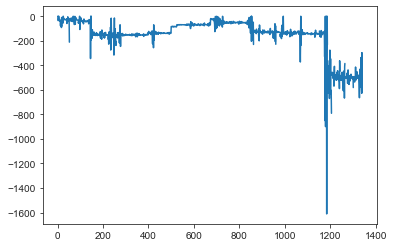

In [1204]:
trade_sheet['rolling_max']= trade_sheet['P&L'].rolling(250,min_periods=1).max()
trade_sheet['daily_drawdown'] = trade_sheet['P&L']-trade_sheet['rolling_max']
trade_sheet['daily_drawdown'].plot()

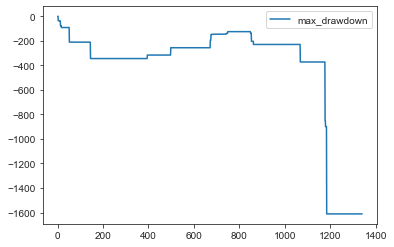

In [1205]:
trade_sheet['max_drawdown']= trade_sheet['daily_drawdown'].rolling(250,min_periods=1).min()
trade_sheet['max_drawdown'].plot(label='max_drawdown')
plt.legend(loc='best')

## heatmap without sl

In [1206]:
df = trade_sheet.groupby('month_year').sum()
df.index = pd.to_datetime(df.index)
df['month'] = [i.month for i in df.index]
df['year'] = [i.year for i in df.index]

In [1207]:
results = df.groupby(['year','month'])
Return = pd.DataFrame(results['P&L'].apply(lambda row:row.iloc[0]).reset_index())
Return_df = Return.pivot(index='year',columns='month',values ='P&L')

Return_df.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [1208]:
Return_df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2015,-209.35,72.75,-204.70,9.40,54.40,52.45,53.95,-110.80,160.25,70.95,63.35,40.55
2016,-136.15,-191.00,-82.90,46.30,39.85,43.30,45.15,37.95,31.45,42.90,-193.90,49.10
2017,31.25,24.80,39.10,9.05,9.85,14.85,12.60,24.15,20.20,21.20,27.00,41.10
2018,-139.95,5.55,40.60,39.20,32.30,38.10,34.25,25.60,-1.25,-213.80,89.90,83.05
2019,63.95,56.35,-105.35,46.20,172.05,46.05,-5.60,37.20,-189.70,72.25,52.45,27.05
2020,24.00,69.65,-1705.25,-406.10,362.65,198.00,22.20,1.05,11.65,76.80,-502.70,NaN


In [1209]:
def color_positive_green(val):
    if val > 0:
        color = 'mediumspringgreen'#'#01B8AA'#'green
    else:
        color = 'lightcoral'#'#FD625E'#'red'
    return 'background-color:%s'%color

In [1210]:
heatmap = Return_df.style.applymap(color_positive_green).set_precision(2)

In [1211]:
heatmap

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2015,-209.35,72.75,-204.70,9.40,54.40,52.45,53.95,-110.80,160.25,70.95,63.35,40.55
2016,-136.15,-191.00,-82.90,46.30,39.85,43.30,45.15,37.95,31.45,42.90,-193.90,49.10
2017,31.25,24.80,39.10,9.05,9.85,14.85,12.60,24.15,20.20,21.20,27.00,41.10
2018,-139.95,5.55,40.60,39.20,32.30,38.10,34.25,25.60,-1.25,-213.80,89.90,83.05
2019,63.95,56.35,-105.35,46.20,172.05,46.05,-5.60,37.20,-189.70,72.25,52.45,27.05
2020,24.00,69.65,-1705.25,-406.10,362.65,198.00,22.20,1.05,11.65,76.80,-502.70,nan


## tradesheet with stop loss

In [1212]:
df_with_sl = pd.DataFrame(columns = [ 'date', 'spot_price', 'expiry', 'type', 'month_year',
       'day', 'ATR', 'PE_OTM', 'day_to_expiry', 'CE_OTM', 'strangle', 'P&L',
       'Total_P&L', 'CE_OTM_Strike', 'PE_OTM_Strike', 'call_theta',
       'put_theta', 'call_delta', 'put_delta', 'new_strangle',
       'exit_condition', 'cum_pnl', 'exit_flag', 'rank'])

stoploss_ptg = 50
for month_year in trade_sheet['month_year'].unique():
    df_new = pd.DataFrame()
    df_new = trade_sheet[trade_sheet['month_year'] == month_year]

    df_new['new_strangle'] = df_new['strangle'].iloc[0]
    df_new['exit_condition']= round((df_new['new_strangle']*stoploss_ptg)/100,2) 
    df_new['cum_pnl'] = df_new['P&L'].cumsum()
    df_new['exit_flag'] = np.where(df_new['cum_pnl'].abs() > df_new['exit_condition'].abs(),1,0)
   
    df_new['rank']= df_new.groupby(['exit_flag'])['exit_flag'].rank(method = 'first')

    df_new.drop(df_new[(df_new['exit_flag']==True) & (df_new['rank'] > 1.0)].index, inplace = True)

#     del df_new['Unnamed: 0']
    df_with_sl = pd.concat([df_with_sl,df_new])


In [1213]:
df_with_sl.tail(3)

,date,spot_price,expiry,type,month_year,day,ATR,PE_OTM,day_to_expiry,CE_OTM,...,call_delta,put_delta,new_strangle,exit_condition,cum_pnl,exit_flag,rank,rolling_max,daily_drawdown,max_drawdown
1325,NaN,12120.3,2020-11-26 00:00:00,PE,2020-11,NaN,176.230362,25.05,21.0,131.25,...,0.388893,-0.031610,-178.95,-89.48,22.65,0,4.0,501.3,-512.45,-1610.85
1326,NaN,12263.5,2020-11-26 00:00:00,PE,2020-11,NaN,175.078194,20.45,20.0,179.90,...,0.484251,-0.015651,-178.95,-89.48,-21.40,0,5.0,501.3,-545.35,-1610.85
1327,NaN,12461.0,2020-11-26 00:00:00,PE,2020-11,NaN,177.608323,10.45,17.0,290.50,...,0.626808,-0.003449,-178.95,-89.48,-122.00,1,1.0,501.3,-601.90,-1610.85


In [1214]:
with_sl = df_with_sl.groupby('month_year').sum()
with_sl.index =  pd.to_datetime(with_sl.index)

with_sl['month'] = [i.month for i in with_sl.index]
with_sl['year'] = [i.year for i in with_sl.index]

results_with_sl = with_sl.groupby(['year','month'])
Return_SL = pd.DataFrame(results_with_sl['P&L'].apply(lambda row:row.iloc[0]).reset_index())
Return_df_SL = Return_SL.pivot(index='year',columns='month',values ='P&L')

Return_df_SL.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [1215]:
Return_df_SL

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2015,0.80,42.30,-204.70,9.40,20.30,43.10,29.70,8.15,82.40,44.10,5.7,21.75
2016,-32.65,30.75,81.00,31.45,20.55,26.90,5.45,20.95,16.85,10.20,-28.2,18.45
2017,17.65,14.35,23.95,2.90,5.15,8.05,4.45,1.30,9.90,8.05,17.3,20.90
2018,-29.00,-4.55,12.95,23.00,4.35,20.20,-2.20,13.65,21.80,-39.80,35.1,-8.00
2019,39.75,5.50,88.85,25.25,1.95,15.25,-15.45,19.05,-28.75,44.15,29.3,16.95
2020,14.45,43.70,-168.30,-406.10,120.55,2.05,187.65,7.20,-30.45,27.20,-122.0,NaN


In [1216]:
def color_positive_green(val):
    if val > 0:
        color = 'mediumspringgreen'#'#01B8AA'#'green
    else:
        color = 'lightcoral'#'#FD625E'#'red'
    return 'background-color:%s'%color

In [1217]:
heatmap_with_sl = Return_df_SL.style.applymap(color_positive_green).set_precision(2)

In [1218]:
heatmap_with_sl

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2015,0.80,42.30,-204.70,9.40,20.30,43.10,29.70,8.15,82.40,44.10,5.70,21.75
2016,-32.65,30.75,81.00,31.45,20.55,26.90,5.45,20.95,16.85,10.20,-28.20,18.45
2017,17.65,14.35,23.95,2.90,5.15,8.05,4.45,1.30,9.90,8.05,17.30,20.90
2018,-29.00,-4.55,12.95,23.00,4.35,20.20,-2.20,13.65,21.80,-39.80,35.10,-8.00
2019,39.75,5.50,88.85,25.25,1.95,15.25,-15.45,19.05,-28.75,44.15,29.30,16.95
2020,14.45,43.70,-168.30,-406.10,120.55,2.05,187.65,7.20,-30.45,27.20,-122.00,nan


In [1219]:
del df_with_sl['rolling_max']
del df_with_sl['daily_drawdown']
del df_with_sl['max_drawdown']

## With Stop loss Calculate the Max drawdown in the past window days for each day

In [1220]:
df_with_sl['rolling_max']= df_with_sl['P&L'].rolling(250,min_periods=1).max()
df_with_sl['daily_drawdown'] = df_with_sl['P&L']-trade_sheet['rolling_max']

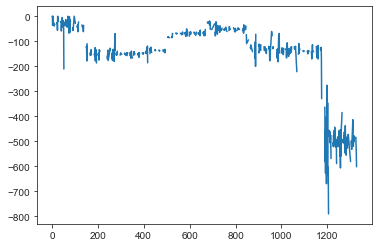

In [1221]:
df_with_sl['daily_drawdown'].plot()

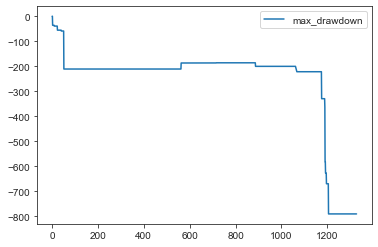

In [1222]:
df_with_sl['max_drawdown']= df_with_sl['daily_drawdown'].rolling(250,min_periods=1).min()
df_with_sl['max_drawdown'].plot(label='max_drawdown')
plt.legend(loc='best')

In [1223]:
df_with_sl['Total_P&L']=df_with_sl['P&L'].cumsum()

In [1224]:
df_with_sl.index = df_with_sl.expiry

In [1225]:
# df_with_sl['max_daily_drawdown'].plot(kind='area',label='max_daily_drawdown')
# # df_with_sl['P&L'].plot(kind='area',label='P&L')
# plt.legend(loc='best')

### Trade Analysis

## with Stop loss reports

In [1226]:
trades_sl = df_with_sl.groupby('month_year').sum()

reports_sl = []



total_trades = len(trades_sl)
total_profit_loss =df_with_sl['Total_P&L'][-1]
largest_Profit=round(trades_sl['P&L'].max())
largest_loss = round(trades_sl['P&L'].min())
Average_Profit_Loss = round(trades_sl['P&L'].mean())
profit_trades = len(trades_sl[trades_sl['P&L'] > 0])
loss_trades = len(trades_sl[trades_sl['P&L'] < 0])
trades_sl['loss_count'] = np.where(trades_sl['P&L'] < 0, 1, 0)
trades_sl['lc'] = (trades_sl['loss_count'].diff(1) != 0).cumsum()
max_con_loss = trades_sl[trades_sl['loss_count'] == 1].groupby('lc').size().max()
max_con_profit = trades_sl[trades_sl['loss_count'] == 0].groupby('lc').size().max()



  

reports_sl.append(dict(title='Total Trades', value=total_trades))
reports_sl.append(dict(title='Total Profit & Loss', value=total_profit_loss))
reports_sl.append(dict(title='Largest Profit', value=largest_Profit))
reports_sl.append(dict(title='Largest Loss', value=largest_loss))
reports_sl.append(dict(title='Average Profit & Loss', value=Average_Profit_Loss))
reports_sl.append(dict(title='Profitable Trades', value=profit_trades))
reports_sl.append(dict(title='Losing Trades', value=loss_trades))
reports_sl.append(dict(title='Max Con. Loss', value=max_con_loss))
reports_sl.append(dict(title='Max Con. Profit', value=max_con_profit))


In [1227]:
import pprint
pprint.pprint(reports_sl)

[{'title': 'Total Trades', 'value': 71},
 {'title': 'Total Profit & Loss', 'value': 403.8999999999995},
 {'title': 'Largest Profit', 'value': 188},
 {'title': 'Largest Loss', 'value': -406},
 {'title': 'Average Profit & Loss', 'value': 6},
 {'title': 'Profitable Trades', 'value': 57},
 {'title': 'Losing Trades', 'value': 14},
 {'title': 'Max Con. Loss', 'value': 2},
 {'title': 'Max Con. Profit', 'value': 13}]


In [1228]:
report_sl = pd.DataFrame(reports_sl)

In [1229]:
report_sl

,title,value
0,Total Trades,71.0
1,Total Profit & Loss,403.9
2,Largest Profit,188.0
3,Largest Loss,-406.0
4,Average Profit & Loss,6.0
5,Profitable Trades,57.0
6,Losing Trades,14.0
7,Max Con. Loss,2.0
8,Max Con. Profit,13.0


## without Stop loss reports

In [1230]:
print(np.array(trade_sheet['Total_P&L'].tail(1)))

[-1481.2]


In [1231]:
trade_sheet['Total_P&L'].iat[-1]

-1481.2000000000003

In [1232]:
trades_without_sl = trade_sheet.groupby('month_year').sum()

reports_without_sl = []



total_trades = len(trades_without_sl)
total_profit_loss =trade_sheet['Total_P&L'].iat[-1]
largest_Profit=round(trades_without_sl['P&L'].max())
largest_loss = round(trades_without_sl['P&L'].min())
Average_Profit_Loss = round(trades_without_sl['P&L'].mean())
profit_trades = len(trades_without_sl[trades_without_sl['P&L'] > 0])
loss_trades = len(trades_without_sl[trades_without_sl['P&L'] < 0])
trades_without_sl['loss_count'] = np.where(trades_without_sl['P&L'] < 0, 1, 0)
trades_without_sl['lc'] = (trades_without_sl['loss_count'].diff(1) != 0).cumsum()
max_con_loss = trades_without_sl[trades_without_sl['loss_count'] == 1].groupby('lc').size().max()
max_con_profit = trades_without_sl[trades_without_sl['loss_count'] == 0].groupby('lc').size().max()



  

reports_without_sl.append(dict(title='Total Trades', value=total_trades))
reports_without_sl.append(dict(title='Total Profit & Loss', value=total_profit_loss))
reports_without_sl.append(dict(title='Largest Profit', value=largest_Profit))
reports_without_sl.append(dict(title='Largest Loss', value=largest_loss))
reports_without_sl.append(dict(title='Average Profit & Loss', value=Average_Profit_Loss))
reports_without_sl.append(dict(title='Profitable Trades', value=profit_trades))
reports_without_sl.append(dict(title='Losing Trades', value=loss_trades))
reports_without_sl.append(dict(title='Max Con. Loss', value=max_con_loss))
reports_without_sl.append(dict(title='Max Con. Profit', value=max_con_profit))

In [1233]:
reports_without_sl

[{'title': 'Total Trades', 'value': 71},
 {'title': 'Total Profit & Loss', 'value': -1481.2000000000003},
 {'title': 'Largest Profit', 'value': 363},
 {'title': 'Largest Loss', 'value': -1705},
 {'title': 'Average Profit & Loss', 'value': -21},
 {'title': 'Profitable Trades', 'value': 55},
 {'title': 'Losing Trades', 'value': 16},
 {'title': 'Max Con. Loss', 'value': 3},
 {'title': 'Max Con. Profit', 'value': 13}]

In [1234]:
report_without_sl_df = pd.DataFrame(reports_without_sl)

In [1235]:
report_without_sl_df

,title,value
0,Total Trades,71.0
1,Total Profit & Loss,-1481.2
2,Largest Profit,363.0
3,Largest Loss,-1705.0
4,Average Profit & Loss,-21.0
5,Profitable Trades,55.0
6,Losing Trades,16.0
7,Max Con. Loss,3.0
8,Max Con. Profit,13.0


## `Report selection`

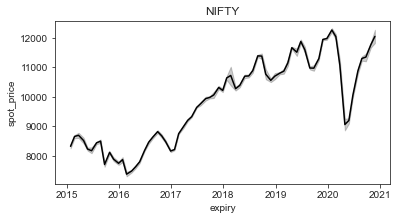

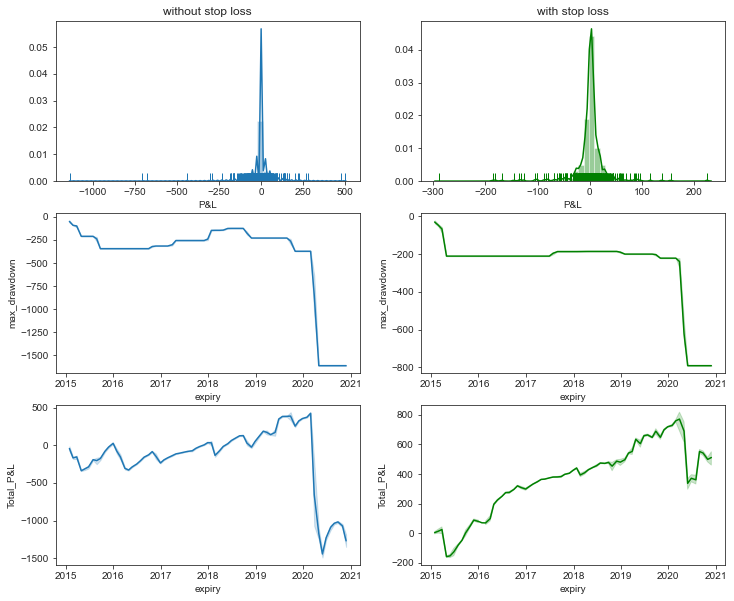

In [1236]:
fig_dims = (6,3)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=df_with_sl, y='spot_price',x='expiry',color='k', ax=ax)
plt.title(select_contract)

fig, axes = plt.subplots(3, 2, figsize=(12,10))
sns.distplot(trade_sheet['P&L'],rug=True,ax=axes[0,0])
axes[0,0].set_title('without stop loss')

sns.distplot(df_with_sl['P&L'],color ='g',rug=True,ax=axes[0,1])
axes[0,1].set_title('with stop loss')

sns.lineplot(data=trade_sheet,y='max_drawdown',x='expiry',ax=axes[1,0])
# axes[1,0].set_title('without stop loss')

sns.lineplot(data=df_with_sl,x='expiry',y='max_drawdown',color='g',ax=axes[1,1])
# axes[1,1].set_title('with stop loss')

sns.lineplot(data=trade_sheet, y='Total_P&L',x= 'expiry',ax=axes[2,0])

sns.lineplot(data=df_with_sl, y='Total_P&L',x='expiry',color ='g',ax=axes[2,1])


In [1237]:
report_without_sl_df # without stop loss

,title,value
0,Total Trades,71.0
1,Total Profit & Loss,-1481.2
2,Largest Profit,363.0
3,Largest Loss,-1705.0
4,Average Profit & Loss,-21.0
5,Profitable Trades,55.0
6,Losing Trades,16.0
7,Max Con. Loss,3.0
8,Max Con. Profit,13.0


In [1238]:
report_sl # with stop loss

,title,value
0,Total Trades,71.0
1,Total Profit & Loss,403.9
2,Largest Profit,188.0
3,Largest Loss,-406.0
4,Average Profit & Loss,6.0
5,Profitable Trades,57.0
6,Losing Trades,14.0
7,Max Con. Loss,2.0
8,Max Con. Profit,13.0


In [1239]:
heatmap # without stop loss

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2015,-209.35,72.75,-204.70,9.40,54.40,52.45,53.95,-110.80,160.25,70.95,63.35,40.55
2016,-136.15,-191.00,-82.90,46.30,39.85,43.30,45.15,37.95,31.45,42.90,-193.90,49.10
2017,31.25,24.80,39.10,9.05,9.85,14.85,12.60,24.15,20.20,21.20,27.00,41.10
2018,-139.95,5.55,40.60,39.20,32.30,38.10,34.25,25.60,-1.25,-213.80,89.90,83.05
2019,63.95,56.35,-105.35,46.20,172.05,46.05,-5.60,37.20,-189.70,72.25,52.45,27.05
2020,24.00,69.65,-1705.25,-406.10,362.65,198.00,22.20,1.05,11.65,76.80,-502.70,nan


In [1240]:
heatmap_with_sl # with sl

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2015,0.80,42.30,-204.70,9.40,20.30,43.10,29.70,8.15,82.40,44.10,5.70,21.75
2016,-32.65,30.75,81.00,31.45,20.55,26.90,5.45,20.95,16.85,10.20,-28.20,18.45
2017,17.65,14.35,23.95,2.90,5.15,8.05,4.45,1.30,9.90,8.05,17.30,20.90
2018,-29.00,-4.55,12.95,23.00,4.35,20.20,-2.20,13.65,21.80,-39.80,35.10,-8.00
2019,39.75,5.50,88.85,25.25,1.95,15.25,-15.45,19.05,-28.75,44.15,29.30,16.95
2020,14.45,43.70,-168.30,-406.10,120.55,2.05,187.65,7.20,-30.45,27.20,-122.00,nan
